# Exercise: NEISS, Question Set R

#### Summary

The [National Electronic Injury Surveillance System](https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS) is a data product produced by the US Consumer Product Safety Commission. It tracks emergency room injuries related to consumer products (e.g., "a door fell on me!").

#### Files

- **nss15.tsv**: injury data (one injury per row)
- **2017NEISSCodingManualCPSConlyNontrauma.pdf**: column definitions and explanations
- **2015 Neiss data highlights.pdf**: a partial summary of the data
- **2017ComparabilityTable.pdf**: product code definitions
- **categories-cleaned.txt**: product code definitions in CSV format (great for joining!)

#### Source

https://www.cpsc.gov/Safety-Education/Safety-Guides/General-Information/National-Electronic-Injury-Surveillance-System-NEISS

#### Skills

- Using codebooks
- Reading tab-separated files
- Ignoring bad lines
- Replacing LOTS of values
- Merging dataframes
- Using numpy/`np.nan`
- Padding strings
- String search using regular expressions

# Read in `nss15.tsv`

Some of the lines just **aren't formatted correctly**. Maybe we can avoid those?

In [1]:
import pandas as pd
df = pd.read_csv("nss15.tsv", sep = '\t', error_bad_lines = False)

b'Skipping line 10822: expected 19 fields, saw 20\n'
b'Skipping line 48623: expected 19 fields, saw 20\nSkipping line 62534: expected 19 fields, saw 20\n'
b'Skipping line 103739: expected 19 fields, saw 20\n'
b'Skipping line 135495: expected 19 fields, saw 20\nSkipping line 151678: expected 19 fields, saw 20\n'
b'Skipping line 237135: expected 19 fields, saw 20\nSkipping line 240597: expected 19 fields, saw 20\n'
b'Skipping line 274270: expected 19 fields, saw 20\nSkipping line 277461: expected 19 fields, saw 20\n'


### Check that your dataframe has 357727 rows and 19 columns.

In [2]:
df.shape

(357727, 19)

In [3]:
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,1,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,1,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,1,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


### List the columns and their data types

In [4]:
df.dtypes

CPSC Case #      int64
trmt_date       object
psu              int64
weight         float64
stratum         object
age              int64
sex              int64
race             int64
race_other      object
diag             int64
diag_other      object
body_part        int64
disposition      int64
location         int64
fmv              int64
prod1            int64
prod2          float64
narr1           object
narr2           object
dtype: object

### What does each column mean?

In [5]:
# CPSC Case       int64         Case Number
# trmt_date       object        Date of Treatment
# psu              int64
# weight         float64
# stratum         object
# age              int64        Age of Patient
# sex              int64        Gender of Patient
# race             int64        Race and Ethnicity
# race_other      object        Other Race and/or Ethnicity
# diag             int64        Diagnosis
# diag_other      object
# body_part        int64        Body Part Affected
# disposition      int64        Disposition of Case
# location         int64        Incident Locale
# fmv              int64        Fire Involvement
# prod1            int64        product field
# prod2          float64        product field
# narr1           object        Comments
# narr2           object
# dtype: object

# Cleaning up a column

Take a look at the **body part** column. How many rows of each body part are there?

## Replace the numbers with the appropriate words they stand for.

Those numbers are terrible - codes are fine for storage but not really for reading. **Replace the numbers with the  words they stand for.**

Refer to pages 11-12 of the column definitions file, or... hey, I typed it in below!

- Tip: If I've already talked about how to replace values, maybe there's a really easy way to replace a lot at once? Maybe I'll tell you if you ask me?

In [6]:
df.sex.value_counts()

1    195071
2    162654
0         2
Name: sex, dtype: int64

In [7]:
# Male 1
# Female 2
# Not recorded 0

In [8]:
df.sex = df.sex.replace(1, "Male") # save infomation back to the database
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,2,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,2,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [9]:
df.sex.replace(2, "Femlae", inplace = True) 
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Femlae,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Femlae,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [10]:
df.sex.replace(0, "Not recorded", inplace = True) 
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,33,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,34,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Femlae,0,NaN,71,OTITIS EXTERNA,94,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,35,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Femlae,3,HISPANIC,62,NaN,75,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [11]:
# 0:  'internal'
# 30: 'shoulder'
# 31: 'upper trunk'
# 32: 'elbow'
# 33: 'lower arm'
# 34: 'wrist'
# 35: 'knee'
# 36: 'lower leg'
# 37: 'ankle'
# 38: 'pubic region'
# 75: 'head'
# 76: 'face'
# 77: 'eyeball'
# 79: 'lower trunk'
# 80: 'upper arm'
# 81: 'upper leg'
# 82: 'hand'
# 83: 'foot'
# 84: '25-50% of body'
# 85: 'all parts of body'
# 87: 'not recorded'
# 88: 'mouth'
# 89: 'neck'
# 92: 'finger'
# 93: 'toe'
# 94: 'ear'

In [12]:
df.body_part.value_counts()

75    58677
76    30992
79    30579
92    30463
37    20077
31    19518
35    18957
82    17077
83    15890
30    14822
33    13655
36    12771
34    11565
32     8888
85     8615
88     7336
93     7299
89     6145
77     4661
94     4404
81     4174
80     4016
0      3344
87     2079
38     1699
84       24
Name: body_part, dtype: int64

In [13]:
replacements = {
    0:  'internal',
    30: 'shoulder',
    31: 'upper trunk',
    32: 'elbow',
    33: 'lower arm',
    34: 'wrist',
    35: 'knee',
    36: 'lower leg',
    37: 'ankle',
    38: 'pubic region',
    75: 'head',
    76: 'face',
    77: 'eyeball',
    79: 'lower trunk',
    80: 'upper arm',
    81: 'upper leg',
    82: 'hand',
    83: 'foot',
    84: '25-50% of body',
    85: 'all parts of body',
    87: 'not recorded',
    88: 'mouth',
    89: 'neck',
    92: 'finger',
    93: 'toe',
    94: 'ear'
}

In [14]:
df.body_part.replace(replacements, inplace = True)
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,wrist,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Femlae,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,knee,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Femlae,3,HISPANIC,62,NaN,head,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


## Confirm you have 58677 head, 30992 face, and 30579 lower trunk.

Isn't this much nicer?

In [15]:
df.body_part.value_counts()

head                 58677
face                 30992
lower trunk          30579
finger               30463
ankle                20077
upper trunk          19518
knee                 18957
hand                 17077
foot                 15890
shoulder             14822
lower arm            13655
lower leg            12771
wrist                11565
elbow                 8888
all parts of body     8615
mouth                 7336
toe                   7299
neck                  6145
eyeball               4661
ear                   4404
upper leg             4174
upper arm             4016
internal              3344
not recorded          2079
pubic region          1699
25-50% of body          24
Name: body_part, dtype: int64

## Graph the number of each body part, but don’t included the “Not Recorded” records

In [16]:
%matplotlib inline

In [17]:
a = df[df.body_part != 'not recorded'].body_part.value_counts(ascending=True)

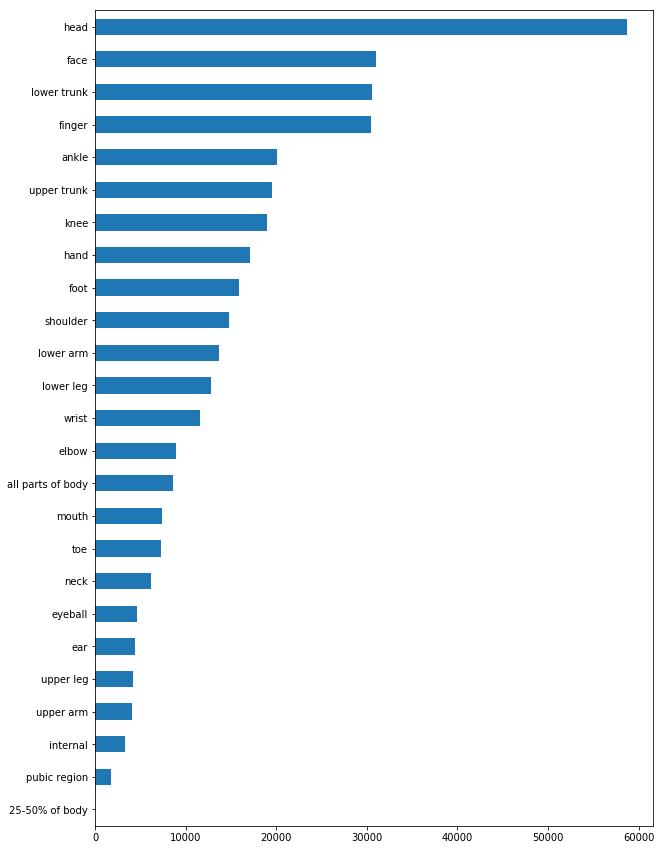

In [18]:
a.plot(kind='barh', figsize = (10,15))

## "Not Recorded" seems silly - change it to be `NaN` instead

Don't use `na_values` for this.

In [19]:
import numpy as np
np.nan

nan

In [20]:
df.sex.replace('Not recorded', np.nan, inplace = True)  # NaN won't be showed in value_counts
df.sex.value_counts()

Male      195071
Femlae    162654
Name: sex, dtype: int64

In [21]:
df.sex.value_counts(dropna = False) # count NaN

Male      195071
Femlae    162654
NaN            2
Name: sex, dtype: int64

In [22]:
df.body_part.replace('not recorded', np.nan, inplace = True)
df.body_part.value_counts()

head                 58677
face                 30992
lower trunk          30579
finger               30463
ankle                20077
upper trunk          19518
knee                 18957
hand                 17077
foot                 15890
shoulder             14822
lower arm            13655
lower leg            12771
wrist                11565
elbow                 8888
all parts of body     8615
mouth                 7336
toe                   7299
neck                  6145
eyeball               4661
ear                   4404
upper leg             4174
upper arm             4016
internal              3344
pubic region          1699
25-50% of body          24
Name: body_part, dtype: int64

## Graph the count of each body part, but don’t included the “Not Recorded” records

Yes, again! The code you use should be different this time.

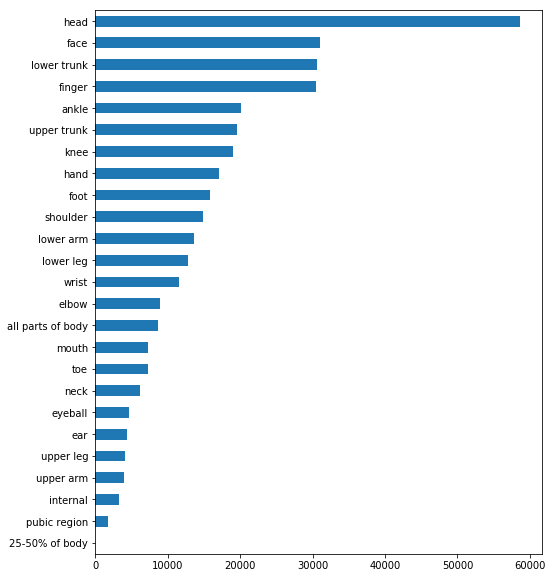

In [23]:
df.body_part.value_counts(ascending = True).plot(kind = 'barh', figsize = (8,10))

## For each body part, get the average age of the person who injured that part

Sort from youngest to oldest

In [24]:
df.groupby('body_part')['age'].mean().sort_values()

body_part
pubic region         19.985874
ear                  24.248183
ankle                28.477512
wrist                30.697968
lower arm            32.357598
foot                 32.578666
knee                 34.106451
toe                  34.988766
hand                 35.811208
finger               35.978170
elbow                36.592934
eyeball              36.669599
neck                 38.354109
shoulder             39.266901
lower leg            44.255814
25-50% of body       44.333333
upper leg            45.934835
upper trunk          46.587663
upper arm            46.655129
face                 47.749193
lower trunk          49.667844
mouth                51.241957
head                 59.512637
internal             62.912978
all parts of body    63.406268
Name: age, dtype: float64

## Wait, "all parts of body" seems really really really really old!

How can the average age be like 63???? Read page 6 of the documentation. Fix the issue however you think is best, but explain what you're doing. **It would be nice to talk about this in class if you'd write it on the board!**

### Tech tip you might find useful

If you want to replace a column based on a condition, pandas will probably yell at you. You get to learn this new thing called `loc` now! 

```
df.loc[df.country == 'Angola', "continent"] = "Africa"
```

This updates the `continent` column to be `Africa` for every row where `country == 'Angola'`. You CANNOT do the following, which is probably what you've wanted to do:

```
df[df.country == 'Angola']['continent'] = 'Africa'
```

And now you know.

In [25]:
df.loc[df.age >= 200, "age"] = 1
df.groupby('body_part')['age'].mean().sort_values()

body_part
internal              7.003888
mouth                12.184978
ear                  16.369891
pubic region         17.444379
face                 22.550368
elbow                24.099122
lower arm            25.143171
all parts of body    26.533720
ankle                27.605569
eyeball              28.138168
finger               28.792141
foot                 28.895406
wrist                29.298919
toe                  29.787642
hand                 29.839199
head                 31.228659
lower leg            33.302326
knee                 33.470961
neck                 36.473230
shoulder             36.907300
upper leg            37.790369
upper arm            40.624004
25-50% of body       44.333333
upper trunk          44.351317
lower trunk          48.751398
Name: age, dtype: float64

# Finding injuries

## How many people were injured by "Musical instruments, electric or battery operated?"

Try to do what you think would work, then see... it doesn't work. There are all kinds of reasons why it wouldn't work. Keep reading once it doesn't work for you.

- Tip: `prod1` and `prod2` are the product fields
- Tip: You can use the codebook or `cleaned-categories.txt`

### Did something go wrong when you read in your data?

Maybe it's one of those problems like we had with `008382` in the homework, where when we read in the file it got rid of the leading zeroes? Try to read the file in again and fix that.

Try to get all of the "Musical instruments, electric or battery operated" injurie again. It still won't work. Keep reading.

In [26]:
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,wrist,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Femlae,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,knee,1,0,0,611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Femlae,3,HISPANIC,62,NaN,head,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [27]:
df.prod1.value_counts()

1842    28609
1807    28255
4076    16707
1205    14095
5040    12737
1211    11614
4074     8239
1884     7755
1893     7689
4057     7327
464      7281
611      7184
1267     7140
3299     7057
679      5081
1615     3673
4078     3665
1233     3197
4056     3116
5041     3063
1616     2949
1817     2933
1333     2858
1141     2831
1244     2692
604      2635
1871     2608
3265     2549
1894     2519
649      2475
        ...  
416         2
815         2
481         2
1531        1
958         1
558         1
401         1
116         1
1539        1
213         1
119         1
1350        1
932         1
5013        1
807         1
125         1
270         1
212         1
139         1
240         1
221         1
1517        1
236         1
462         1
1515        1
1739        1
1441        1
223         1
533         1
556         1
Name: prod1, Length: 757, dtype: int64

### Looks the data export is bad!

They turned `0565` into `565` when they exported it or something (so irresponsible!), and it's up to us to fix it. Pad the `prod1` and `prod2` columns to be the proper length. If you didn't actually do the task above it's going to be more difficult.

In [28]:
# if prod1 was not a string column yet
# (alternative: dytpe = {'prod1': str})
df['prod1'] = df.prod1.astype(str).str.pad(4, fillchar = '0')
df.head()

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,NaN,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT
1,150734723,07/06/2015,43,83.2157,S,36,Male,1,NaN,57,NaN,wrist,1,1,0,1439,4057.0,"L WRIST FX(?)/36YOWM 2 WKS AGO@G-FRIENDS HM,MO...",AN OBJECT&TWISTED WRIST TRYING TO CONTOL MOWER...
2,150817487,08/02/2015,51,74.8813,L,20,Femlae,0,NaN,71,OTITIS EXTERNA,ear,1,0,0,3274,NaN,20 YO F C/O EAR PAIN 1 DAY SAS WAS SWIMMING YE...,T TRIED TO USE ***S TO REMOVE WAX MADE IT WORS...
3,150717776,06/26/2015,41,15.7762,V,61,Male,0,NaN,71,PAIN,knee,1,0,0,0611,NaN,61YOM W/KNEE PAIN S/P FALLING IN SHOWER 2 DAYS...,NaN
4,150721694,07/04/2015,42,74.8813,L,88,Femlae,3,HISPANIC,62,NaN,head,1,0,0,1893,1807.0,88YOF PAIN TO HEAD WHEN FALL TO FLOOR WHEN WAL...,DOOR AND FELL.DENIES LOC. DX HEAD INJURY


In [29]:
df.prod1.value_counts()

1842    28609
1807    28255
4076    16707
1205    14095
5040    12737
1211    11614
4074     8239
1884     7755
1893     7689
4057     7327
0464     7281
0611     7184
1267     7140
3299     7057
0679     5081
1615     3673
4078     3665
1233     3197
4056     3116
5041     3063
1616     2949
1817     2933
1333     2858
1141     2831
1244     2692
0604     2635
1871     2608
3265     2549
1894     2519
0649     2475
        ...  
4083        2
1730        2
3230        2
0223        1
0212        1
0807        1
0270        1
0462        1
0116        1
0533        1
0958        1
0125        1
0139        1
0240        1
1531        1
0401        1
1350        1
0213        1
0558        1
0236        1
1517        1
0221        1
1539        1
1515        1
1739        1
0556        1
5013        1
0119        1
0932        1
1441        1
Name: prod1, Length: 757, dtype: int64

## How many people were injured by musical instruments, total?

Include normal musical instruments, electric musical instruments and toy musical instruments.

- Tip: You can use the codebook or `cleaned-categories.txt`
- Tip: Answer this in one line **without** using `and` or `&`.

In [59]:
instrument = ['0565', '1344', '0566']
df[df['prod1'].isin(instrument)].shape

#226

(226, 19)

## Out of those three, which is the most popular reason for admission?

In [63]:
a = df[df['prod1'].isin(instrument)]
a

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,diag_other,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2
2279,151140234,11/13/2015,95,16.5650,V,17,Male,1,NaN,53,NaN,foot,1,0,0,0566,NaN,RT FOOT CONT. 17YOM HIT FOOT ON GUITAR CASE.,NaN
2715,150339539,03/17/2015,21,15.0591,V,39,Male,0,NaN,61,NaN,finger,1,0,0,0566,NaN,39YM P/W THE LT HAND MIDDLE FINGERS C NUMBNES...,NO>>NEUROPRAXIA OF LT MEDIAN NERVE
3231,150830969,08/13/2015,73,83.2157,S,16,Male,0,NaN,71,PAIN,lower trunk,1,8,0,0566,NaN,16YOM CARRYING HEAVY DRUMS DURING MARCHING BAN...,DEVELOPED PAIN IN LOWER BACK- DX- LUMBAR PAIN
3938,150526993,05/04/2015,90,5.6748,C,1,Male,3,HISPANIC,41,NaN,internal,1,1,0,1344,NaN,"9 MOM SMASHED A BEETLE WITH A TOY GUITAR, WHIC...",AFTERWARDS- HE TOOK IT OUT & ATE REMAINS-VOMIT...
4876,150523891,05/06/2015,20,5.6748,C,2,Male,1,NaN,72,NaN,finger,1,1,0,0566,NaN,2YOM PLAYING WITH DRUM AND HIT FINGER; DX AVU...,NaN
7274,150610620,01/29/2015,40,15.0591,V,1,Male,3,HISPANIC,59,NaN,mouth,1,1,0,1344,NaN,19 MOM HAD A TOY PLASTIC FLUTE IN HIS MOUTH TR...,LACERATION TO THE MOUTH DX ORAL TRAUMA
8532,150214020,01/18/2015,93,15.0591,V,50,Male,2,NaN,64,NaN,shoulder,1,1,0,0566,5011.0,50 YOM HAS INCREASE PX AFTER PLAYING GUITAR & ...,"DX: L TRAPEZIUS MUSCLE STRAIN, SHOULDER PX."
10243,150744700,07/13/2015,56,83.2157,S,43,Male,1,NaN,59,NaN,finger,1,0,0,0566,NaN,"43 YOM HIT HAND ON MANDOLIN & CUT THUMB, BLEED...",TION OF THUMB
14363,150823235,08/07/2015,95,15.7762,V,22,Male,1,NaN,71,SHOULDER PAIN,shoulder,1,5,0,0566,NaN,BILATERAL SHOULDER PAIN. 22YOM PAIN IN BOTH S...,TRUMENT DURING BAND PRACTICE.
14406,151018865,10/03/2015,32,5.6748,C,13,Femlae,1,NaN,64,NaN,ankle,1,8,0,0566,NaN,13 YOF TRIPPED OVER MUSICAL INSTRUMENT CASE AT...,SPRAIN


In [64]:
a.narr1.value_counts()

52YOM AT HOME DEVELOPED NECK PAIN ,B/L SHOULDER PAIN                       1
16YOM WTIH SPRAINED WRIST, TRIPPED OVER INSTRUMENT IN BAND PRACTICE        1
13MF WAS HOLDING A DRUM STICK IN MOUTH&FELL IN THE BR, UNWIT'D&FD BY MO    1
49YM PLAYED DRUMS LAST WK FOR 1ST X IN A LONG TIME WOKE UP NEXT DAY C W    1
41YO M WAS HLEPING BROTHER IN LAW MOVE A GRAND PIANO WHEN IT SLIPPED AN    1
FOREIGN BODY THUMB.  81YOF DUSTING PIANO AND SOMETHING LODGED IN THUMB.    1
76 YOM STATES WAS PLAYING HIS SAXAPHONE FLET WEST SAT DOWN & PASSED        1
20 YO F CARRYING TROMBONE IN MARCHING BAND INJURED SHOULDER                1
4 YOF INJURED ROOF OF MOUTH WHILE PLAYING A TOY TROMBONE DX LACERATION     1
29YOM HELPING UNLOAD A PIANO AT CHURCH, HURT HIS LOWER BACK                1
17YOF HIT WITH LARGE HAND BELL MUSICAL INSTRUMENT IN HEAD;DX CONCUSSION    1
10YOF POKED IN EYE WITH DRUM STICK;  DX CONTUSED EYE                       1
10 MOF PLAYING WITH TOY FLUTE IN MOUTH FELL. DX LIP LACERATION             1

## What parts of the body are injured by musical instruments most often?

In [65]:
a.body_part.value_counts()

face                 32
head                 30
finger               23
upper trunk          19
mouth                18
lower trunk          15
shoulder             13
wrist                12
toe                  10
foot                  8
knee                  6
lower arm             6
all parts of body     6
neck                  5
eyeball               5
hand                  4
elbow                 4
lower leg             3
ear                   3
ankle                 2
internal              1
upper arm             1
Name: body_part, dtype: int64

# Adding categories

## Read in `categories-cleaned.txt`

In [85]:
df2 = pd.read_csv('categories-cleaned.txt', header= None, names = ['no','descriptions'])
df2['no'] = df2['no'].astype(str).str.pad(4, fillchar = '0')
df2

,no,descriptions
0,0102,Wringer washing machines
1,0106,Electric clothes dryers without washers
2,0107,Gas clothes dryers without washers
3,0110,Electric heating pads
4,0112,Sewing machines or accessories
5,0113,Floor buffers or waxers
6,0114,Rug shampooers
7,0115,Vacuum cleaners
8,0116,Electric brooms
9,0118,Gas water heaters


In [86]:
df2['no'].value_counts()

4062    1
3282    1
4065    1
1453    1
0676    1
1645    1
1294    1
0842    1
0428    1
1325    1
1462    1
1525    1
0427    1
0139    1
1450    1
0669    1
0653    1
0102    1
1103    1
1829    1
5010    1
0270    1
1200    1
1206    1
0421    1
0651    1
1816    1
1138    1
1354    1
0280    1
       ..
0530    1
1659    1
3203    1
1326    1
0827    1
0910    1
3202    1
0871    1
0914    1
5018    1
1116    1
1539    1
3257    1
1817    1
0649    1
1526    1
1736    1
0852    1
0934    1
0959    1
0692    1
0951    1
1641    1
0981    1
1537    1
0405    1
0942    1
1542    1
4009    1
4004    1
Name: no, Length: 803, dtype: int64

## How many different categories are electric/electrical/electronic?

In [35]:
df2[df2['descriptions'].str.contains(r'[^t]\s\belectr[io][cn].*') | df2['descriptions'].str.contains(r'Electr[io][cn].*')]['descriptions'].value_counts()

Electric combs                                                                            1
Computers (equipment and electronic games)                                                1
Electric chandeliers, hanging lamps or other attached light fixtures                      1
Cords, electrical, other or not specified                                                 1
Electric Christmas decorations (excluding Christmas tree lights)                          1
Electric water heaters (excluding immersion heaters)                                      1
Electric frying pans and skillets                                                         1
Ashtrays, electric or battery operated                                                    1
Other electric lighting equipment                                                         1
Electric blenders                                                                         1
Electric immersion water heaters                                                

In [36]:
(df2['descriptions'].str.contains(r'[^t]\s\belectr[io][cn].*') | df2['descriptions'].str.contains(r'Electr[io][cn].*')).value_counts()

False    752
True      51
Name: descriptions, dtype: int64

In [37]:
df.shape

(357727, 19)

## Join this with your injuries dataframes to give every row a text product code

In [82]:
df.shape

(357727, 19)

In [89]:
c = df.merge(df2, left_on='prod1', right_on='no')
c

,CPSC Case #,trmt_date,psu,weight,stratum,age,sex,race,race_other,diag,...,body_part,disposition,location,fmv,prod1,prod2,narr1,narr2,no,descriptions
0,150733174,07/11/2015,38,15.7762,V,5,Male,0,NaN,57,...,lower arm,1,9,0,1267,NaN,5 YR OLD MALE PLAYING SOCCER BLOCKING BALL AND...,X IT,1267,"Soccer (activity, apparel or equipment)"
1,150821622,07/20/2015,43,83.2157,S,20,Femlae,1,NaN,57,...,lower leg,1,9,0,1267,NaN,L DISTAL FIB FX/20YOWF WHILE PLAYING SOCCER AT...,LE CAUSING INJURY TO DISTAL FIB.,1267,"Soccer (activity, apparel or equipment)"
2,150948626,09/08/2015,37,5.6748,C,10,Femlae,0,NaN,57,...,lower arm,1,0,0,1267,NaN,10 YO F TRIPPED FORWARD WHEN PLAYING SOCCER FX...,NaN,1267,"Soccer (activity, apparel or equipment)"
3,151029422,10/06/2015,24,97.9239,M,37,Male,1,NaN,64,...,knee,1,0,0,1267,NaN,J/ 37 YOM. LT KNEE PAIN AFTER HE KICKED THE BA...,DXL KNEE SPRAIN,1267,"Soccer (activity, apparel or equipment)"
4,151029234,10/10/2015,21,16.5650,V,13,Femlae,0,NaN,62,...,head,1,9,0,1267,NaN,13YF H/A&VOMITINGX4 S/P GOT STRUCK TO HEAD C T...,>>CHI,1267,"Soccer (activity, apparel or equipment)"
5,151038066,10/16/2015,21,16.5650,V,13,Femlae,0,NaN,64,...,wrist,1,9,0,1267,NaN,13YF WRIST PAIN S/P FOOSH WHILE PLAYING SOCCER...,>>SPRAIN,1267,"Soccer (activity, apparel or equipment)"
6,150959538,09/18/2015,32,5.6748,C,15,Male,1,NaN,64,...,foot,1,9,0,1267,NaN,15 YOM PLAYING SOCCER BEGAN HAVING HEEL PAIN D...,NaN,1267,"Soccer (activity, apparel or equipment)"
7,150442809,04/15/2015,25,15.0591,V,15,Femlae,1,NaN,64,...,foot,1,8,0,1267,NaN,A 15YOF INJURED FOOT WHILE PLAYING SOCCER AT S...,NaN,1267,"Soccer (activity, apparel or equipment)"
8,151042493,10/15/2015,8,5.6748,C,17,Femlae,1,NaN,57,...,face,1,9,0,1267,NaN,17YOF COLLIDED HEADS PLAYING SOCCER GAME; ORBI...,COMPLEX RFX.,1267,"Soccer (activity, apparel or equipment)"
9,151026219,09/02/2015,14,49.2646,M,15,Male,0,NaN,52,...,head,1,8,0,1267,NaN,15YOM CONCUSSION - KNEED PLAYING SOCCER,NaN,1267,"Soccer (activity, apparel or equipment)"


In [90]:
c.shape

(357721, 21)

## How many different injuries involved an electric/electrical/electronic product?

In [91]:
(c['descriptions'].str.contains(r'[^t]\s\belectr[io][cn].*') | c['descriptions'].str.contains(r'Electr[io][cn].*')).value_counts()

False    355686
True       2035
Name: descriptions, dtype: int64

## Graph the most common injuries involving an electrical product

In [92]:
d = c[(c['descriptions'].str.contains(r'[^t]\s\belectr[io][cn].*') | c['descriptions'].str.contains(r'Electr[io][cn].*'))]

In [42]:
d['descriptions'].value_counts()

Electric shoe polishers                                                                   28609
Electric timers                                                                           28255
Electric baseboard heaters                                                                28255
Electric brooms                                                                           28255
Electric or battery-powered knives                                                        16707
Electrical wire or wiring systems (excluding panelboards, receptacles or interrupters)    14095
Floor lamps or table lamps, electric (excluding halogen lamps)                            14095
Electric combs                                                                            14095
Electric griddles                                                                         12737
Electric ranges or ovens (excl. counter-top ovens)                                        12737
Scales, electric or battery operated (ex

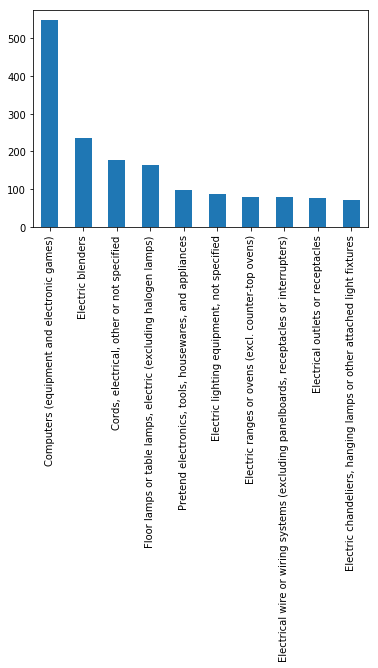

In [93]:
d['descriptions'].value_counts().head(10).plot(kind='bar')

## When people get injuries using an electrical product, what part of their body is injured?

In [94]:
d['body_part'].value_counts()

finger               323
head                 276
hand                 195
face                 179
lower trunk          138
foot                 129
all parts of body    120
upper trunk           99
lower arm             69
eyeball               56
toe                   56
shoulder              51
lower leg             51
neck                  48
wrist                 47
mouth                 44
knee                  35
ankle                 27
elbow                 22
upper leg             20
internal              17
upper arm             16
ear                    6
pubic region           6
Name: body_part, dtype: int64

## What product is most likely to injure your mouth?

In [97]:
d[d['body_part'] == 'mouth']['descriptions'].value_counts().head()

Computers (equipment and electronic games)                                                19
Pretend electronics, tools, housewares, and appliances                                    11
Floor lamps or table lamps, electric (excluding halogen lamps)                             4
Cords, electrical, other or not specified                                                  3
Electrical wire or wiring systems (excluding panelboards, receptacles or interrupters)     1
Name: descriptions, dtype: int64

## What product is most likely to injure your ears?

In [99]:
d[d['body_part'] == 'ear']['descriptions'].value_counts().head()

Electrical wire or wiring systems (excluding panelboards, receptacles or interrupters)    1
Computers (equipment and electronic games)                                                1
Pretend electronics, tools, housewares, and appliances                                    1
Other electric lighting equipment                                                         1
Electric razors or shavers                                                                1
Name: descriptions, dtype: int64

## Replace different ways of writing "UNKNOWNS" in race

In [46]:
df['race_other'] = df.race_other.str.replace('U.?N.*N.?', 'UNKNOWN')
df.race_other.value_counts()

HISPANIC           14389
MULTI-RACIAL        1727
UNKNOWN             1680
HISP                1334
NS                   495
SOMALI               318
MULTIRACIAL          146
BIRACIAL              32
MULTI                 22
NEPALI                20
DECLINED              15
MULTI RACIAL          12
MEXICAN               10
`                     10
MIXED                  7
ARABIC                 7
ARAB                   7
PUERTO RICAN           6
FULANI                 6
RUSSIAN                6
SPANISH                6
HINDI                  4
TWI                    4
ARMENIAN               3
HISPNANIC              3
MIDDLE EASTERN         3
ETHIOPIAN              3
TELUGU                 2
OTHER                  2
BI-RACIAL              2
                   ...  
HISPAANIC              1
NATIVE AMERICAN        1
HISPNIC                1
S                      1
HIDPSNIV               1
GUJARATI               1
JAPANESE               1
M                      1
Q                      1
